In [1]:
# Dubbi:
#1 come mai le chiavi di a sembrano random?
#2 come faccio a non fare re-inserimento ?? Ricorda io estraggo d-1 cosi, più uno, più un altro che è quello di arrivo

In [40]:
import OffsetArrays
using Plots
using Revise
using ProgressMeter
using SparseArrays, LinearAlgebra, IndexedGraphs, Graphs
include("./src/functions.jl")

pop_dynamics (generic function with 2 methods)

# Population dynamics for the messages

In [41]:
# S=0   I=1
# The times go from ti = 0 to ti=T+1
# when ti=0 it means that i is the zero patient
# when ti=T+1 it means that i is never infected

λp = 0.6 # planted infection rate
λi = 0.6 # inferred infection rate

d = 3 # degree (fixed for now) 
T = 4 # discrete time

γp = 0.1 # planted autoinfection probability
γi = 0.1 # inferred autoinfection probability

N = 5000; #population size

In [46]:
γvalues = [0.01, 0.1, 0.4, 0.7]
λvalues = [0.01, 0.1]
p_infer = zeros(length(γvalues),length(λvalues))
for γcount = 1:length(γvalues)
    for λcount = 1:length(λvalues)
        λi = λp = λvalues[λcount]
        γi = γp = γvalues[γcount]
        marg2D = pop_dynamics(N,T,λp,λi,γp,γi,d, tot_iterations = 40)
        # we sum over the trace of the 2D marginal to find the probability to infere correctly
        p_infer[γcount,λcount] = sum([marg2D[t,t] for t=1:T+2])
    end
end

Progress: 100%|█████████████████████████████████████████| Time: 0:00:00
Progress: 100%|█████████████████████████████████████████| Time: 0:00:01
Progress: 100%|█████████████████████████████████████████| Time: 0:00:00
Progress: 100%|█████████████████████████████████████████| Time: 0:00:01
Progress: 100%|█████████████████████████████████████████| Time: 0:00:00
Progress: 100%|█████████████████████████████████████████| Time: 0:00:01
Progress: 100%|█████████████████████████████████████████| Time: 0:00:00
Progress: 100%|█████████████████████████████████████████| Time: 0:00:01
Progress: 100%|█████████████████████████████████████████| Time: 0:00:00
Progress: 100%|█████████████████████████████████████████| Time: 0:00:00
Progress: 100%|█████████████████████████████████████████| Time: 0:00:00
Progress: 100%|█████████████████████████████████████████| Time: 0:00:01
Progress: 100%|█████████████████████████████████████████| Time: 0:00:00
Progress: 100%|█████████████████████████████████████████| Time: 

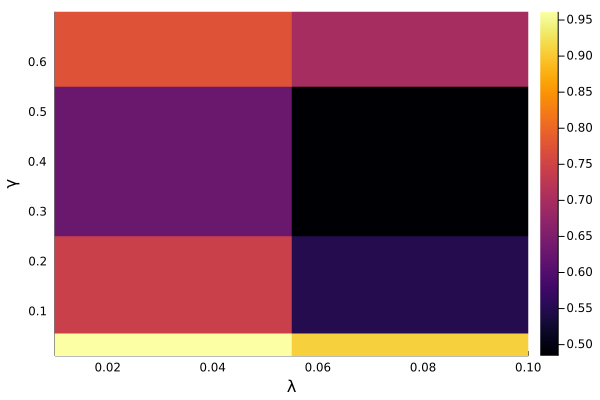

In [55]:
heatmap(λvalues,γvalues,p_infer,xlabel="λ",ylabel="γ",xlims=(minimum(λvalues),maximum(λvalues)),ylims=(minimum(γvalues),maximum(γvalues)))

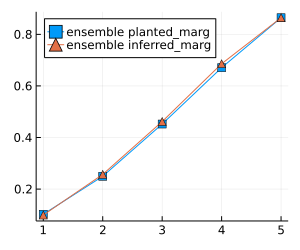

In [22]:
p0 = plot(cumsum(sum(marg2D,dims=1)'[1:end-1],dims=1),marker=:square,label="ensemble planted_marg")
p0 = plot!(cumsum(sum(marg2D,dims=2)[1:end-1],dims=1),marker=:utriangle,label="ensemble inferred_marg",legend=:bottomright)
plot(p0,size=(300,250),legend=:topleft)